# Accelerating the Mandelbrot fractal - Cython

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
%load_ext cython

# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Parameter definitions

In [2]:
size = 400
iterations = 100

### Defining a Cython kernel (without proporly defining variables)

In [3]:
%%cython -a
import numpy as np   # Copy here again to be included in Cython

def mandelbrot_cython(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

### Running the simulation

In [4]:
s = (size, size)
m = np.zeros(s, dtype=np.int32)

start_time = time.time() # Starting a timer:
mandelbrot_cython(m, size, iterations)
print(" Simulation took      : %1.1f (s)" % (time.time() - start_time))

 Simulation took      : 5.9 (s)


### Plotting the results

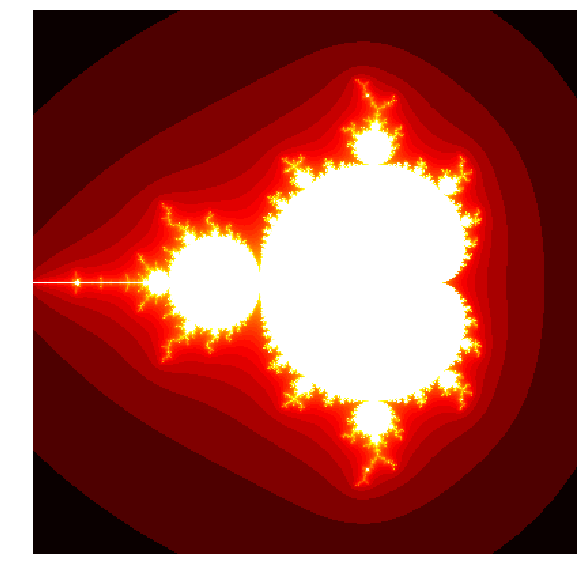

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

### Defining a Cython kernel (with proporly defining variables)

In [6]:
%%cython -a
import numpy as np

def mandelbrot_cython2(int[:,::1] m,
                      int size,
                      int iterations):
    cdef int i, j, n
    cdef complex z, c
    for i in range(size):
        for j in range(size):
            c = -2. + 3./size*j + 1j*(1.5-3./size*i)
            z = 0.
            for n in range(iterations):
                if z.real**2 + z.imag**2 <= 100:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

### Running the simulation

In [7]:
s = (size, size)
m = np.zeros(s, dtype=np.int32)

start_time = time.time() # Starting a timer:
mandelbrot_cython2(m, size, iterations)
print(" Simulation took      : %1.5f (s)" % (time.time() - start_time))

 Simulation took      : 0.01847 (s)


### Plotting the results

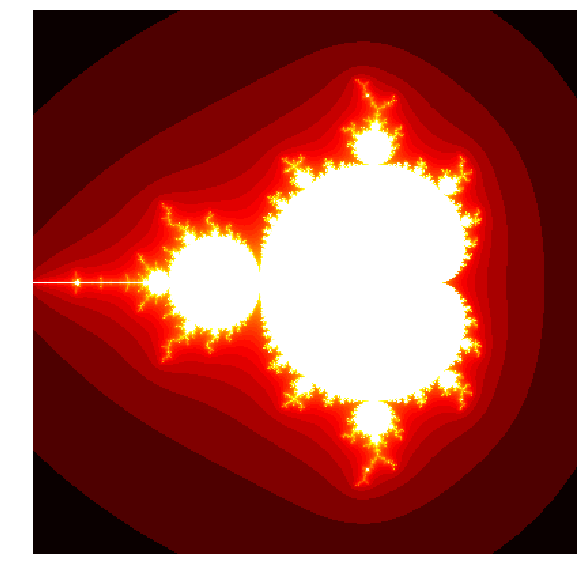

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

Brilliantly copied from: https://ipython-books.github.io/55-accelerating-python-code-with-cython/